<a href="https://colab.research.google.com/github/dimpu1076/Image-Classification-with-ResNet/blob/main/Image_Classification_with_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference Code

This code is taken from this blog: https://vitalflux.com/pytorch-load-predict-pretrained-resnet-model/


In [ ]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
# For Part C, you need to change this and load another ResNet Model
resnet = models.resnet50 (pretrained = True)

In [ ]:
# Print Model architecture
# resnet

In [ ]:
# download a image in sample_data folder
# For part B, you need save 20 images in this folder for inference.
!mkdir sample_data/images/
!wget https://t2.ea.ltmcdn.com/en/razas/0/0/1/labrador-retriever_100_0_orig.jpg -P sample_data/images/

mkdir: cannot create directory ‘sample_data/images/’: File exists
--2023-02-10 23:17:27--  https://t2.ea.ltmcdn.com/en/razas/0/0/1/labrador-retriever_100_0_orig.jpg
Resolving t2.ea.ltmcdn.com (t2.ea.ltmcdn.com)... 185.59.220.17, 156.146.33.27, 195.181.170.19, ...
Connecting to t2.ea.ltmcdn.com (t2.ea.ltmcdn.com)|185.59.220.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23915 (23K) [image/jpeg]
Saving to: ‘sample_data/images/labrador-retriever_100_0_orig.jpg.9’

labrador-retriever_ 100%[===================>]  23.35K  --.-KB/s    in 0.01s   

2023-02-10 23:17:27 (1.76 MB/s) - ‘sample_data/images/labrador-retriever_100_0_orig.jpg.9’ saved [23915/23915]



In [ ]:
# load the image
from PIL import Image
img_dog = Image.open ('sample_data/images/labrador-retriever_100_0_orig.jpg').convert ('RGB')

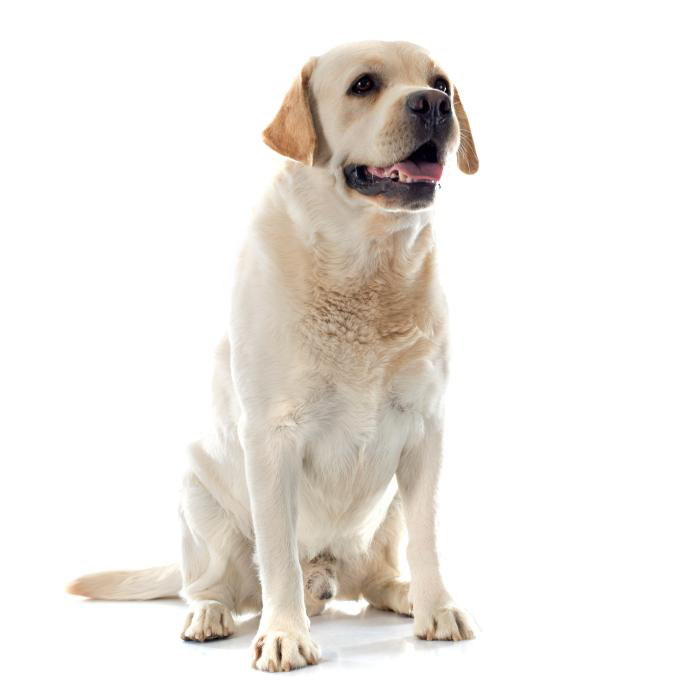

In [ ]:
# Display images
img_dog

In [ ]:
# What's the image size??
img_dog.size

(693, 693)

In [ ]:
# imports for Image transformations
from torchvision import transforms

In [ ]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
          mean=[0.485, 0.456, 0.406],
          std=[0.229, 0.224, 0.225])
    ])
img_dog_processed = preprocess (img_dog)

In [ ]:
img_dog_processed.shape

torch.Size([3, 224, 224])

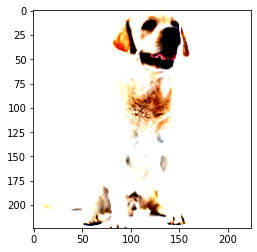

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(  img_dog_processed.permute(1, 2, 0)  )

In [ ]:
#
# Reshape, crop, and normalize the input tensor for feeding into network for evaluation
#
import torch
batch_img_dog_tensor = torch.unsqueeze(img_dog_processed, 0)

In [ ]:
# shape of input
batch_img_dog_tensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
# Change to evaluation mode from training mode
resnet.eval ()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Prediction
out = resnet(batch_img_dog_tensor)

In [ ]:
# What prediction looks like??
out

tensor([[-9.2794e-01,  1.1175e+00, -2.0650e+00, -2.1359e+00, -8.8570e-01,
         -2.4758e-01, -4.3250e+00, -1.6688e+00, -2.9633e+00, -4.6791e+00,
         -2.9884e+00, -2.9171e+00, -2.7358e+00, -4.2579e+00, -1.6177e+00,
         -4.0052e+00, -2.5021e+00, -3.0260e+00, -5.0596e+00, -2.8755e+00,
         -4.0833e+00, -1.3945e+00, -2.9094e+00, -1.1835e+00, -1.4861e+00,
         -1.4753e+00, -2.9099e+00, -1.4722e+00, -1.4424e+00, -1.2563e+00,
         -2.7886e+00, -3.9972e-01, -1.1215e+00, -1.2041e+00, -1.1739e+00,
         -3.5774e+00, -2.1041e+00, -1.8527e+00, -8.8198e-01, -2.3914e+00,
         -2.5582e+00, -1.5106e+00, -1.4299e+00, -2.9173e+00, -1.7992e+00,
         -6.8268e-01, -1.6371e+00, -9.7168e-01, -3.4371e+00, -3.7151e+00,
         -2.7598e+00,  1.7498e+00, -2.8388e+00, -1.3388e+00, -4.2006e+00,
         -5.2259e+00, -2.5980e+00, -3.6819e+00, -3.9197e+00, -3.0020e+00,
         -3.9687e+00, -3.8591e+00, -4.5226e+00, -2.9602e+00, -4.3207e+00,
         -3.1251e+00, -3.5254e+00, -2.

In [ ]:
# Shape of prediction
out.shape

torch.Size([1, 1000])

In [ ]:
out[0][200:210]

tensor([ 3.1991,  0.8297,  0.3544,  0.9005,  2.5422,  6.6550,  7.0526, 16.0910,
        18.1032,  8.3230], grad_fn=<SliceBackward0>)

In [ ]:
# Finding the maximum index
torch.max(out, 1)

torch.return_types.max(
values=tensor([18.1032], grad_fn=<MaxBackward0>),
indices=tensor([208]))

In [ ]:
# Download the index to class name mapping
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2023-02-10 23:17:27--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.7’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-02-10 23:17:27 (97.8 MB/s) - ‘imagenet_classes.txt.7’ saved [10472/10472]



Changes for Part A

In [ ]:
# For Part A, you need to select 10 classes from this list
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
labels[456]

'bow'

In [ ]:
#
# Find the index (tensor) corresponding to the maximum score in the out tensor.
# Torch.max function can be used to find the information
#
_, index = torch.max(out, 1)
#
# Find the score in terms of percentage by using torch.nn.functional.softmax function
# which normalizes the output to range [0,1] and multiplying by 100
#
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
#
# Print the name along with score of the object identified by the model
#
print(labels[index[0]], percentage[index[0]].item())
#
# Print the top 5 scores along with the image label. Sort function is invoked on the torch to sort the scores.
#
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Labrador retriever 87.9219741821289


[('Labrador retriever', 87.9219741821289),
 ('golden retriever', 11.755631446838379),
 ('kuvasz', 0.2197169065475464),
 ('clumber', 0.030994903296232224),
 ('beagle', 0.021491358056664467)]

In [ ]:
percentage[200:210]

tensor([2.9604e-05, 2.7691e-06, 1.7216e-06, 2.9722e-06, 1.5349e-05, 9.3808e-04,
        1.3961e-03, 1.1756e+01, 8.7922e+01, 4.9731e-03],
       grad_fn=<SliceBackward0>)

# Homework 2

Changes for Part A

In [ ]:
indexes = [418, 504, 954, 430, 999, 951, 673, 435, 710, 898, ]
print ("labels: ")
actual_labels=[]
for i in indexes:
  actual_labels.append(labels[i])
  actual_labels.append(labels[i])
  print (labels[i])

labels: 
ballpoint
coffee mug
banana
basketball
toilet tissue
lemon
mouse
bathtub
pencil sharpener
water bottle


In [ ]:
# !mv /image_* /content/sample_data/images
# ! rm -rf /content/sample_data/images/image*

In [ ]:

model_parta = models.resnet50 (pretrained = True)

images,images_processed,images_tensor = [],[],[]

for i in range (20):
  image = Image.open('sample_data/images/image_'+str(i+1)+'.jpg').convert('RGB')
  # plt.imshow(image)
  images.append(image)
  image_processed = preprocess(image)
  images_processed.append(image_processed)
  image_tensor = torch.unsqueeze(image_processed, 0)
  images_tensor.append(image_tensor)

model_parta.eval()

# code to display 20 images, transformed images, their prediction index, class, and confidence score

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
parta_index,parta_label,parta_score,parta_top5=[],[],[],[]
for i in images_tensor:
  out=model_parta(i)
  _, index = torch.max(out, 1)
  percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
  parta_index.append(index[0])
  parta_label.append(labels[index[0]])
  parta_score.append(percentage[index[0]].item())
  _, indices = torch.sort(out, descending=True)
  parta_top5.append([(labels[idx], percentage[idx].item()) for idx in indices[0][:5]])


unprocessed image: 


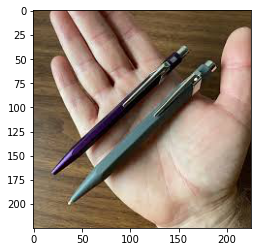

unprocessed image size:  (225, 225)
processed image: 


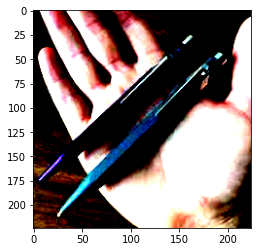

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


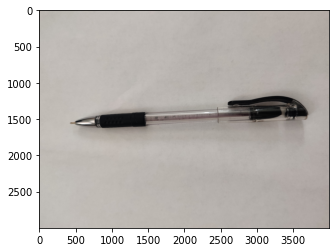

unprocessed image size:  (4000, 3000)
processed image: 


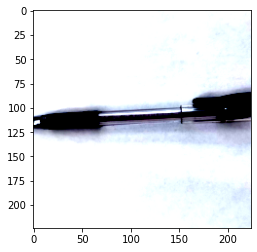

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


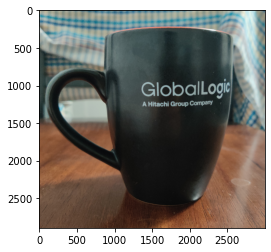

unprocessed image size:  (3000, 2895)
processed image: 


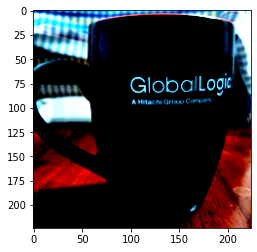

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


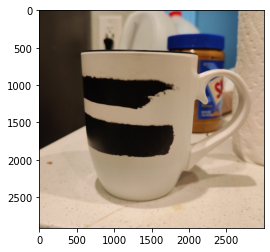

unprocessed image size:  (3000, 2911)
processed image: 


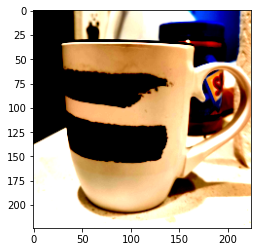

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


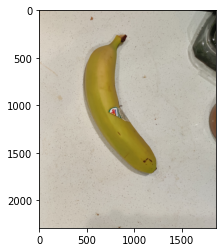

unprocessed image size:  (1862, 2289)
processed image: 


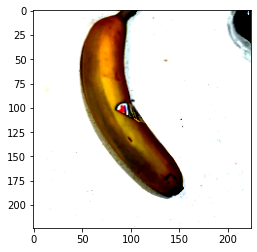

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


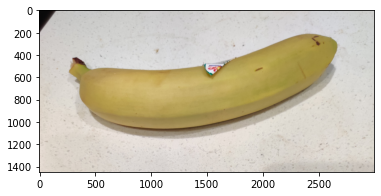

unprocessed image size:  (3000, 1447)
processed image: 


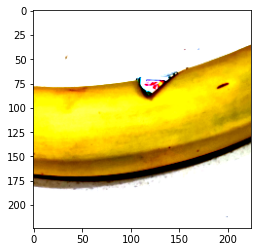

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


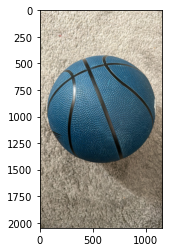

unprocessed image size:  (1152, 2048)
processed image: 


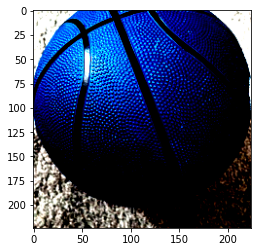

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


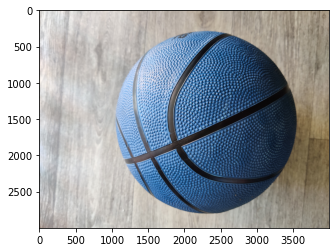

unprocessed image size:  (4000, 3000)
processed image: 


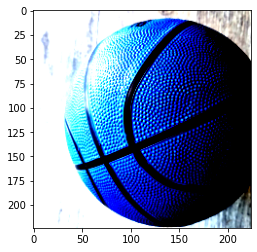

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


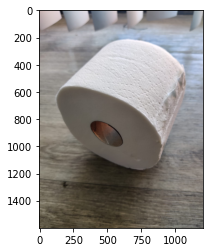

unprocessed image size:  (1200, 1600)
processed image: 


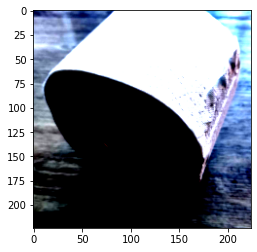

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


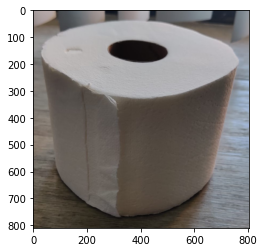

unprocessed image size:  (804, 810)
processed image: 


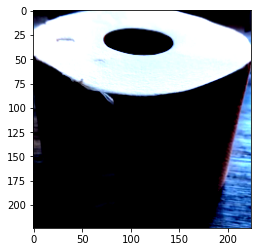

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


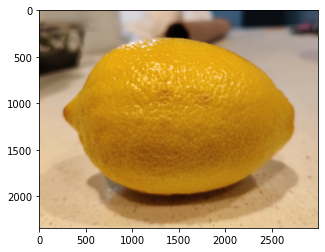

unprocessed image size:  (3000, 2341)
processed image: 


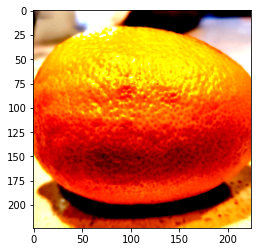

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


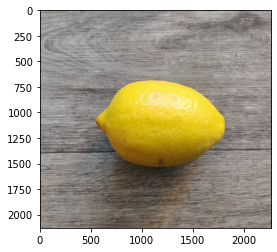

unprocessed image size:  (2263, 2130)
processed image: 


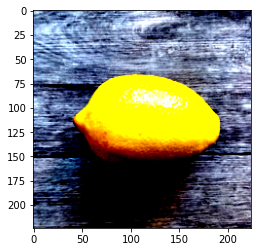

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


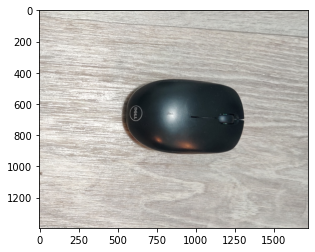

unprocessed image size:  (1724, 1394)
processed image: 


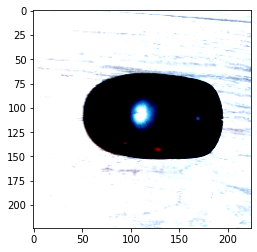

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


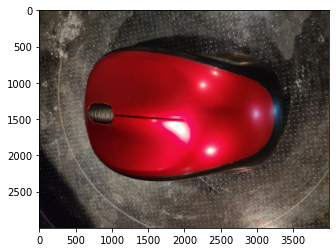

unprocessed image size:  (4000, 3000)
processed image: 


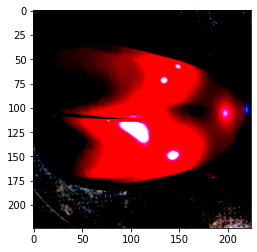

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


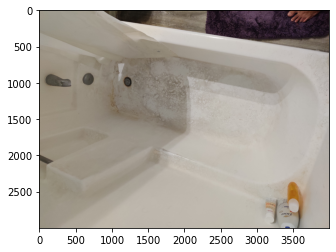

unprocessed image size:  (4000, 3000)
processed image: 


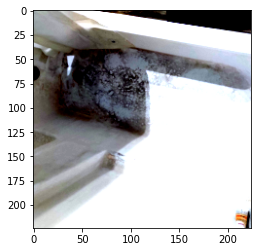

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


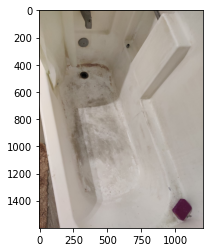

unprocessed image size:  (1200, 1600)
processed image: 


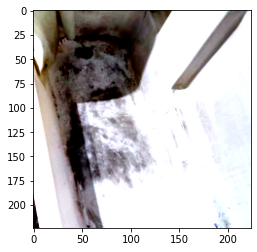

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


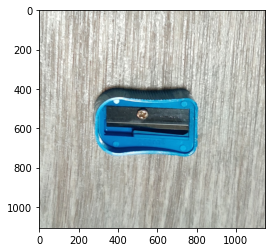

unprocessed image size:  (1151, 1107)
processed image: 


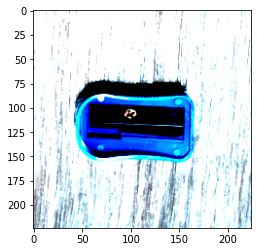

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


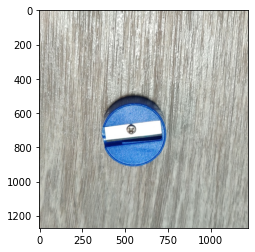

unprocessed image size:  (1220, 1271)
processed image: 


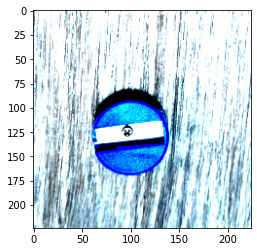

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


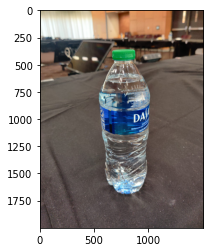

unprocessed image size:  (1500, 2000)
processed image: 


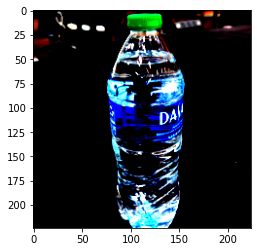

processed image size:  torch.Size([3, 224, 224])
unprocessed image: 


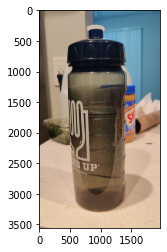

unprocessed image size:  (1977, 3557)
processed image: 


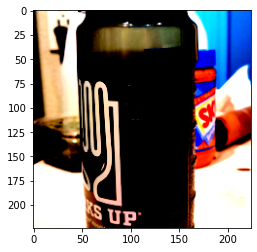

processed image size:  torch.Size([3, 224, 224])


In [ ]:
for i in range (20):
  print ("unprocessed image: ")
  plt.imshow(images[i])
  plt.show()
  print ("unprocessed image size: ", images[i].size)
  print ("processed image: ")
  plt.imshow(images_processed[i].permute(1, 2, 0))
  plt.show()
  print ("processed image size: ", images_processed[i].shape)
  # print ("prediction index: ",parta_index[i])
  # print ("prediction class: ",parta_label[i])
  # print ("confidence score: ",parta_score[i])

Changes for Part B

In [ ]:
model_partb = models.resnet18 (pretrained = True)

# images,images_processed,images_tensor = [],[],[]

# for i in range (20):
#   image = Image.open('sample_data/images/image_'+str(i+1)+'.jpg').convert('RGB')
#   # plt.imshow(image)
#   images.append(image)
#   image_processed = preprocess(image)
#   images_processed.append(image_processed)
#   image_tensor = torch.unsqueeze(image_processed, 0)
#   images_tensor.append(image_tensor)

model_partb.eval()

partb_index,partb_label,partb_score,partb_top5=[],[],[],[]
for i in images_tensor:
  out=model_partb(i)
  _, index = torch.max(out, 1)
  percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
  partb_index.append(index[0])
  partb_label.append(labels[index[0]])
  partb_score.append(percentage[index[0]].item())
  _, indices = torch.sort(out, descending=True)
  partb_top5.append([(labels[idx], percentage[idx].item()) for idx in indices[0][:5]])

# for i in range (20):
#   print ("unprocessed image: ")
#   plt.imshow(images[i])
#   plt.show()
#   print ("unprocessed image size: ", images[i].size)
#   print ("processed image: ")
#   plt.imshow(images_processed[i].permute(1, 2, 0))
#   plt.show()
#   print ("processed image size: ", images_processed[i].size)
#   print ("prediction index: ",parta_index[i])
#   print ("prediction class: ",parta_label[i])
#   print ("confidence score: ",parta_score[i])

# code to display 20 images, transformed images, their prediction index, class, and confidence score

Changes for Part C

In [ ]:
model_partc = models.resnext50_32x4d (pretrained = True)
# images,images_processed,images_tensor = [],[],[]

# for i in range (20):
#   image = Image.open('sample_data/images/image_'+str(i+1)+'.jpg').convert('RGB')
#   # plt.imshow(image)
#   images.append(image)
#   image_processed = preprocess(image)
#   images_processed.append(image_processed)
#   image_tensor = torch.unsqueeze(image_processed, 0)
#   images_tensor.append(image_tensor)
model_partc.eval()

partc_index,partc_label,partc_score,partc_top5=[],[],[],[]
for i in images_tensor:
  out=model_partc(i)
  _, index = torch.max(out, 1)
  percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
  partc_index.append(index[0])
  partc_label.append(labels[index[0]])
  partc_score.append(percentage[index[0]].item())
  _, indices = torch.sort(out, descending=True)
  partc_top5.append([(labels[idx], percentage[idx].item()) for idx in indices[0][:5]])

# for i in range (20):
#   print ("unprocessed image: ")
#   plt.imshow(images[i])
#   plt.show()
#   print ("unprocessed image size: ", images[i].size)
#   print ("processed image: ")
#   plt.imshow(images_processed[i].permute(1, 2, 0))
#   plt.show()
#   print ("processed image size: ", images_processed[i].size)
#   print ("prediction index: ",parta_index[i])
#   print ("prediction class: ",parta_label[i])
#   print ("confidence score: ",parta_score[i])

# code to display 20 images, transformed images, their prediction index, class, and confidence score

In [ ]:
for i in range (20):
  print ("prediction index for Resnet50: ",parta_index[i])
  print ("prediction class for Resnet50: ",parta_label[i])
  print ("confidence score for Resnet50: ",parta_score[i])
  print ("prediction index for Resnet18: ",partb_index[i])
  print ("prediction class for Resnet18: ",partb_label[i])
  print ("confidence score for Resnet18: ",partb_score[i])
  print ("prediction index for Resnext50_32x4d: ",partc_index[i])
  print ("prediction class for Resnext50_32x4d: ",partc_label[i])
  print ("confidence score for Resnext50_32x4d: ",partc_score[i])

prediction index for Resnet50:  tensor(418)
prediction class for Resnet50:  ballpoint
confidence score for Resnet50:  76.86907196044922
prediction index for Resnet18:  tensor(677)
prediction class for Resnet18:  nail
confidence score for Resnet18:  18.092086791992188
prediction index for Resnext50_32x4d:  tensor(418)
prediction class for Resnext50_32x4d:  ballpoint
confidence score for Resnext50_32x4d:  81.26805114746094
prediction index for Resnet50:  tensor(418)
prediction class for Resnet50:  ballpoint
confidence score for Resnet50:  45.53660583496094
prediction index for Resnet18:  tensor(563)
prediction class for Resnet18:  fountain pen
confidence score for Resnet18:  38.779693603515625
prediction index for Resnext50_32x4d:  tensor(418)
prediction class for Resnext50_32x4d:  ballpoint
confidence score for Resnext50_32x4d:  64.08499145507812
prediction index for Resnet50:  tensor(504)
prediction class for Resnet50:  coffee mug
confidence score for Resnet50:  96.05380249023438
predi

In [ ]:
def accuracy(prediction_label):
  total = 0
  for i in range(20):
    if (prediction_label[i] == actual_labels[i]):
      total+=1
  return total*100.0/20.0


In [ ]:
print ("Accuracy for Resnet50: ",accuracy(parta_label))
print ("Accuracy for Resnet18: ",accuracy(partb_label))
print ("Accuracy for Resnext50_32x4d: ",accuracy(partc_label))

Accuracy for Resnet50:  100.0
Accuracy for Resnet18:  60.0
Accuracy for Resnext50_32x4d:  100.0


In [ ]:
# Display comparison between results from parta, partb and partc.
import pandas as pd

graph = {'Resnet50 label':parta_label,'Resnet50 Confidence':parta_score,'Resnet18 label':partb_label,'Resnet18 Confidence':partb_score,'Resnext50_32x4d label':partc_label,'Resnext50_32x4d Confidence':partc_score, 'Actual lable':actual_labels
         }
df = pd.DataFrame(data=graph)
df.style.set_table_attributes("style = 'display:inline'")
df.style.set_caption("prediction labels and confidence scores")


,Resnet50 label,Resnet50 Confidence,Resnet18 label,Resnet18 Confidence,Resnext50_32x4d label,Resnext50_32x4d Confidence,Actual lable
0,ballpoint,76.869072,nail,18.092087,ballpoint,81.268051,ballpoint
1,ballpoint,45.536606,fountain pen,38.779694,ballpoint,64.084991,ballpoint
2,coffee mug,96.053802,coffee mug,96.919189,coffee mug,98.494949,coffee mug
3,coffee mug,73.673981,coffee mug,48.625977,coffee mug,84.507751,coffee mug
4,banana,99.823952,banana,37.206299,banana,99.991096,banana
5,banana,99.534386,spaghetti squash,47.505013,banana,99.874023,banana
6,basketball,99.367203,basketball,99.383354,basketball,98.843735,basketball
7,basketball,92.317261,basketball,99.268677,basketball,99.759491,basketball
8,toilet tissue,81.065109,paper towel,53.877884,toilet tissue,83.073822,toilet tissue
9,toilet tissue,59.160770,toilet tissue,93.629990,toilet tissue,59.247131,toilet tissue
